In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import cv2


/Users/ansinha/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Load MNSIT Data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Shape of the numpy Arrays

In [3]:
# x_train has 60000 images of size 28x28
# y_train has 60000 labels

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


# Plotting to check the image

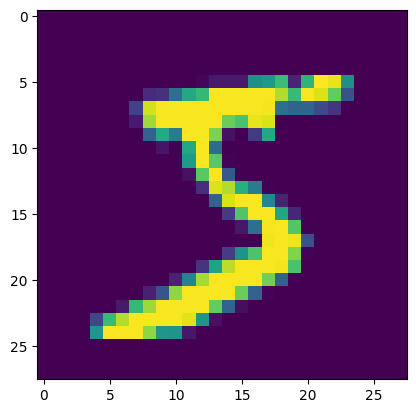

5


In [4]:
plt.imshow(x_train[0])
plt.show()
print(y_train[0])


In [5]:
#checking how many classes are there
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


All the images are of same size. We need to resize the images if they are not of the same size

In [6]:
# The numbers in the numpy array created from the image range from 0 to 255.
# 0 means lowest intensity. 255 means highest intensity
# We want to standardize it to a number between 0-1 so that calculations become easier

x_train = x_train/255
x_test = x_test/255


# Building the neural network

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),# if using RGB images, add 3
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# sparse_categorical_crossentropy

model.fit(x_train, y_train, epochs=10)

/Users/ansinha/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - accuracy: 0.8433 - loss: 0.5297
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 492us/step - accuracy: 0.9548 - loss: 0.1528
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step - accuracy: 0.9654 - loss: 0.1122
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - accuracy: 0.9724 - loss: 0.0892
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 516us/step - accuracy: 0.9776 - loss: 0.0713
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - accuracy: 0.9818 - loss: 0.0602
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.9831 - loss: 0.0514
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.9853 - loss: 0.0457
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - accuracy: 0.9868 - loss: 0.0407
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 495us/step - accuracy: 0.9882 - loss: 0.0343


# Evaluate to Check for overfitting

compare accuracy of training data with accuracy of test data. If accuracy on test data is too low, model is overfitted

In [8]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.9641 - loss: 0.1146


[0.10137911885976791, 0.9692999720573425]

# Predict

In [9]:
y_pred=model.predict(x_test)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step
[[8.86230543e-03 3.25954445e-02 5.27756870e-01 ... 9.99989748e-01
  4.98940408e-01 3.20220768e-01]
 [5.99148823e-03 9.91639197e-01 9.99999940e-01 ... 1.60518113e-10
  4.65351284e-01 1.33896431e-12]
 [4.53790533e-04 9.98131871e-01 3.78819346e-01 ... 1.55045792e-01
  4.07781392e-01 2.31929254e-02]
 ...
 [3.44738214e-12 1.85743754e-03 2.14864314e-03 ... 3.87913324e-02
  4.41024126e-03 8.99513483e-01]
 [1.63664774e-03 1.29579008e-01 1.73253109e-04 ... 1.33268477e-04
  9.42457616e-01 5.45180860e-08]
 [1.10205729e-02 1.37767955e-07 6.78762444e-06 ... 5.48558376e-07
  2.20578551e-01 1.20458935e-05]]


# Converting the prediction probabilities to class labels

use argmax() to find which value is maximum

In [10]:
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


# Converting the prediction probabilities to class labels for all entries


In [11]:
Y_pred_labels = [np.argmax(i) for i in y_pred]

#Confusion matrix

In [12]:
conf_mat = confusion_matrix(y_test, Y_pred_labels)
print(conf_mat)

[[ 963    1    1    1    0    1    8    1    4    0]
 [   0 1123    1    3    0    0    3    0    5    0]
 [   3    1  991    7    5    2    4    5   14    0]
 [   0    0    6  961    1   22    0    3    7   10]
 [   0    0    3    1  958    0    7    3    0   10]
 [   4    0    0    5    1  870    3    0    9    0]
 [   1    2    2    1    3    3  941    0    5    0]
 [   1    8   14    8    4    0    0  972    9   12]
 [   1    1    5    9    4    6    2    1  943    2]
 [   2    5    0    5   10    8    0    2    6  971]]


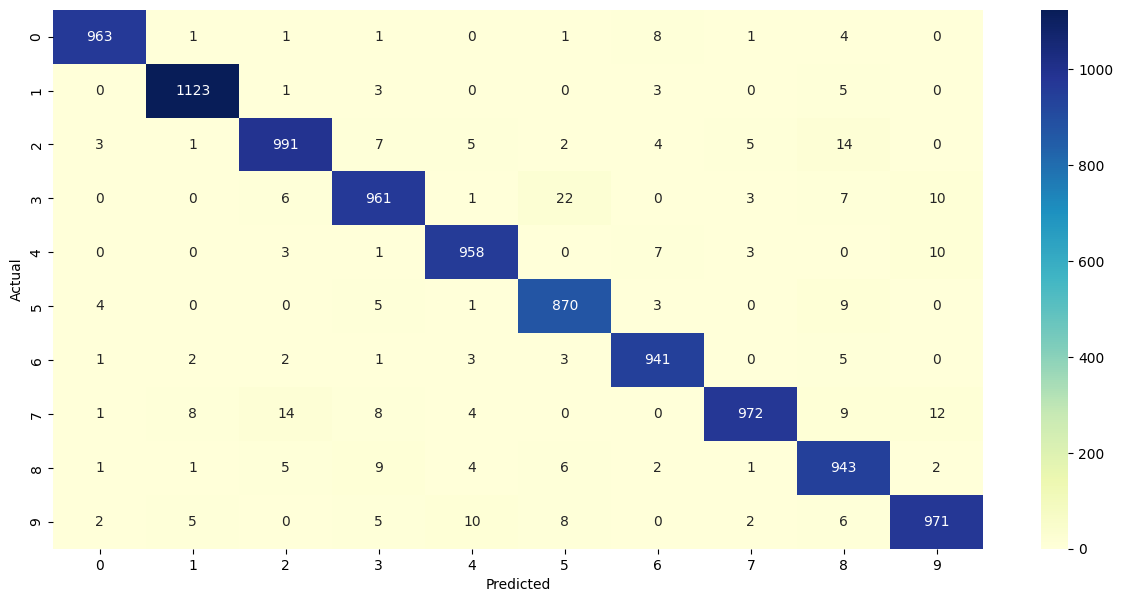

In [13]:
plt.figure(figsize = (15,7))
sn.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Testing a predictive system

1. Put the test image in a path
2. Read the image using cv2
3. Grayscale the image using cv2.cvtColor
4. Resize the test image using cv2.resize
5. Reshape the test image using numpy.reshape
6. Put the reshaped image into the model
7. Put the prediction array you get into np.argmax to get the final class

In [14]:
# input_image_path = '/content/images.png'
# input_image = cv2.imread(input_image_path)

# type(input_image)
# cv2_imshow(input_image)
# input_image.shape
# # the shape is (176, 176, 3) i.e it's is an RGB image with dim 176x176


In [15]:
# # the image has to be resized and grayscaled
# input_image_resize = cv2.resize(input_image, (28,28))
# cv2_imshow(input_image_resize)
# input_image_resize.shape

In [16]:
# # now we need to grayscale the image
# input_image_gray = cv2.cvtColor(input_image_resize, cv2.COLOR_BGR2GRAY)
# cv2_imshow(input_image_gray)


In [17]:
# # Now we feed the input image in the model
# image_Reshaped = input_image_gray.reshape(1,28,28)

# # print(image_Reshaped)

# image_Reshaped = image_Reshaped/255

# # print(image_Reshaped)
# input_prediction = model.predict(image_Reshaped)
# print(input_prediction)

In [18]:
# # Argmax to get the label. Label is the index of the maximum value
# input_pred_label = np.argmax(input_prediction)
# print(input_pred_label)

In [ ]:
# !pip install ipywidgets

import io
import cv2
import numpy as np
from PIL import Image
from IPython.display import display
import ipywidgets as widgets

# ---- Widgets ----
uploader = widgets.FileUpload(accept='image/*', multiple=False)
predict_btn = widgets.Button(description='Predict', disabled=True)
clear_btn = widgets.Button(description='Clear')
out = widgets.Output()

display(widgets.VBox([
    widgets.HBox([widgets.Label("Select an image:"), uploader, predict_btn, clear_btn]),
    out
]))

# ---- State holder ----
_state = {"img_bgr": None, "file_name": None}

def _get_uploaded(u):
    """Return (content_bytes, file_name) from uploader.value across ipywidgets versions."""
    v = u.value
    if not v:
        return None, None
    if isinstance(v, dict):
        item = next(iter(v.values()))
        content = item["content"]
        name = item.get("metadata", {}).get("name", "uploaded")
    else:
        item = v[0]
        content = item["content"]
        name = item.get("name", "uploaded")
    return content, name

@out.capture(clear_output=True)
def _on_upload_change(change):
    content, name = _get_uploaded(uploader)
    if content is None:
        print("No file selected.")
        predict_btn.disabled = True
        return

    # Decode bytes -> BGR image (OpenCV)
    file_bytes = np.frombuffer(content, np.uint8)
    img_bgr = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    if img_bgr is None:
        print("Could not decode image.")
        predict_btn.disabled = True
        return

    _state["img_bgr"] = img_bgr
    _state["file_name"] = name
    predict_btn.disabled = False

    # Preview (convert BGR->RGB for display)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    print(f"Selected: {name}")
    display(Image.fromarray(img_rgb))

@out.capture(clear_output=False)
def _on_predict_click(b):
    if _state["img_bgr"] is None:
        print("Please upload an image first.")
        return

    # ---- Your preprocessing (exactly as in your snippet) ----
    img = _state["img_bgr"]
    img = cv2.resize(img, (28, 28))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img / 255.0
    input_image = np.reshape(img, (1, 28, 28))   # keep as (1, 28, 28) to match your model's expectation

    # ---- Predict ----
    prediction = model.predict(input_image)      # assumes `model` is defined
    prediction_label = int(np.argmax(prediction))
    print(f"Prediction: {prediction_label}")

@out.capture(clear_output=True)
def _on_clear_click(b):
    uploader.value.clear() if hasattr(uploader.value, "clear") else None
    uploader._counter = 0  # reset for some ipywidgets versions
    _state["img_bgr"] = None
    _state["file_name"] = None
    predict_btn.disabled = True
    print("Cleared. Please upload a new image.")

# ---- Wire up events ----
uploader.observe(_on_upload_change, names='value')
predict_btn.on_click(_on_predict_click)
clear_btn.on_click(_on_clear_click)
